In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [10]:
# read data into a dataframe
df = pd.read_csv("Student_Performance.csv")

In [11]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [12]:
# check for mising values
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [13]:
# check for duplicates
df.duplicated().sum()

np.int64(127)

In [14]:
df.shape

(10000, 6)

In [16]:
# drop duplicates
df.drop_duplicates(inplace=True)
df.shape

(9873, 6)

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

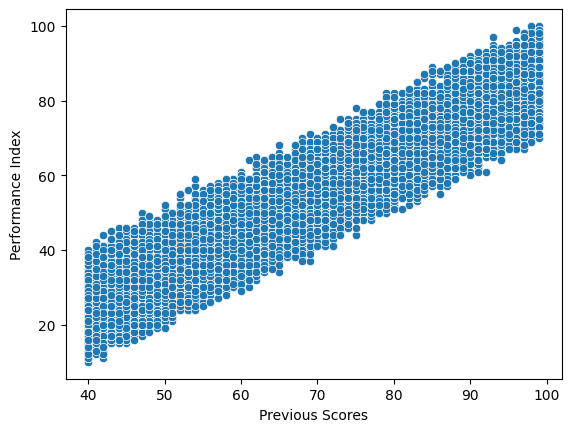

In [17]:
# visualize relationship between performance index and Previous scores
sns.scatterplot(df, x="Previous Scores", y="Performance Index")

## 1. Simple Linear Regression
### Using Previous Score and Performance Index

In [18]:
# split data
x_train, x_test, y_train, y_test = train_test_split(df[["Previous Scores"]], df["Performance Index"], 
                                                    test_size=0.2, random_state=42)

In [19]:
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [20]:
# access line intercept and gradient
gradient, intercept = LR.coef_, LR.intercept_

In [21]:
y_hat = LR.predict(x_test)

In [22]:
# calc regression metrics
mse = mean_squared_error(y_test, y_hat)
r2_value = r2_score(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)

In [23]:
pd.DataFrame({"Metric": ["Mean Square Error", "R2_Score", "Mean Absolute Error"],
              "Value":[mse, r2_value, mae]})

,Metric,Value
0,Mean Square Error,61.110747
1,R2_Score,0.835797
2,Mean Absolute Error,6.708713


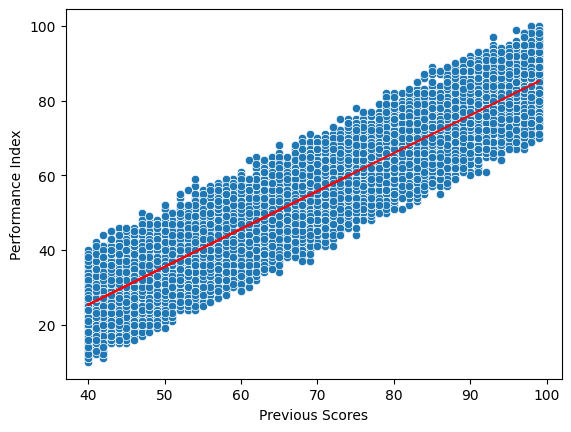

In [25]:
# plot regression line on performance index and Previous scores scatterplot
x = df["Previous Scores"]
sns.scatterplot(df, x="Previous Scores", y="Performance Index")
plt.plot(x, (gradient * x + intercept), c="red")
plt.show()

## Multiple Linear Regression

In [27]:
# dummy Extracurricular Activities
df["Extracurricular Activities"] = df["Extracurricular Activities"].replace({"Yes":1, "No":0})

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_12188\242765373.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Extracurricular Activities"] = df["Extracurricular Activities"].replace({"Yes":1, "No":0})


<Axes: >

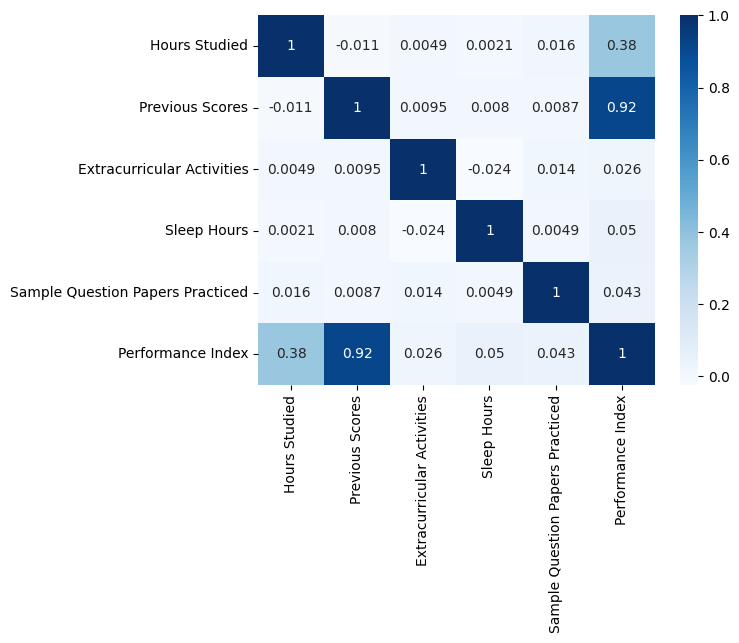

In [33]:
# observe feature correlations
c = df.corr()
sns.heatmap(c, cmap="Blues", annot=True)

In [45]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


### 1. Using only Hours Studied and Previous Scores

In [34]:
X = df[["Hours Studied", "Previous Scores"]]
# split data
x_train, x_test, y_train, y_test = train_test_split(X, df["Performance Index"], 
                                                    test_size=0.2, random_state=42)

In [35]:
# create and train model
LR2 = LinearRegression()
LR2.fit(x_train, y_train)

LinearRegression()

In [36]:
y_hat = LR2.predict(x_test)

In [37]:
# calc regression metrics
mse = mean_squared_error(y_test, y_hat)
r2_value = r2_score(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)

In [38]:
pd.DataFrame({"Metric": ["Mean Square Error", "R2_Score", "Mean Absolute Error"],
              "Value":[mse, r2_value, mae]})

,Metric,Value
0,Mean Square Error,5.573764
1,R2_Score,0.985023
2,Mean Absolute Error,1.879831


### Using all features

In [39]:
X = df.iloc[:, 0:5]
# split data
x_train, x_test, y_train, y_test = train_test_split(X, df["Performance Index"], 
                                                    test_size=0.2, random_state=42)

In [40]:
# create and train model
LR3 = LinearRegression()
LR3.fit(x_train, y_train)

LinearRegression()

In [41]:
y_hat = LR3.predict(x_test)

In [42]:
# calc regression metrics
mse = mean_squared_error(y_test, y_hat)
r2_value = r2_score(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)

In [43]:
pd.DataFrame({"Metric": ["Mean Square Error", "R2_Score", "Mean Absolute Error"],
              "Value":[mse, r2_value, mae]})

,Metric,Value
0,Mean Square Error,4.305901
1,R2_Score,0.988430
2,Mean Absolute Error,1.646970


Mutiple linear Regression provides better results compared to Simple Linear Regression.

Using the two main features most correlated to the target feature and the using all features provides similar results.

Considering the cost of dimentionality, it's sufficient to use just Previous Score and Hours Studied for prediction.